In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [58]:
df_ev_details = pd.read_csv('/content/EV_cars_India_2023.csv')
df_ev_category = pd.read_csv('/content/final_dataset.csv')
df_survey=pd.read_csv('/content/Response.csv')
df_consumer_behaviour=pd.read_csv('/content/Indian automoble buying behavour study 1.0.csv')

In [60]:
print(tabulate(df_ev_details.head(), headers='keys', tablefmt='psql'))

+----+---------------+-------------+---------------+---------------+---------+---------------------+
|    | Car_name      |   Car_price |   Battery_cap |   Drive_range |   Power |   Charge_time hours |
|----+---------------+-------------+---------------+---------------+---------+---------------------|
|  0 | MG Comet EV   |      798000 |         17.3  |           230 |   41.42 |                7    |
|  1 | Tata Tiago EV |     1199000 |         19.2  |           250 |   73.75 |                0.97 |
|  2 | Tata Tigor EV |     1375000 |         26    |           315 |   73.75 |                7.5  |
|  3 | MG ZS EV      |     2740000 |         50.3  |           461 |  174.33 |                9    |
|  4 | BYD Atto 3    |     3449000 |         60.48 |           521 |  201.15 |               10    |
+----+---------------+-------------+---------------+---------------+---------+---------------------+


In [59]:
print(tabulate(df_survey.head(), headers='keys', tablefmt='psql'))

+----+----------+-------+--------------+------+------+------+------+------+--------+--------+--------+--------+--------+------+------+------+------+------+
|    |   gender |   age |   occupation |   K1 |   K2 |   K3 |   K4 |   K5 |   ATT1 |   ATT2 |   ATT3 |   ATT4 |   ATT5 |   P1 |   P2 |   P3 |   P4 |   P5 |
|----+----------+-------+--------------+------+------+------+------+------+--------+--------+--------+--------+--------+------+------+------+------+------|
|  0 |        1 |     1 |            1 |    1 |    1 |    1 |    1 |    1 |      1 |      1 |      1 |      1 |      1 |    1 |    1 |    1 |    1 |    1 |
|  1 |        2 |     2 |            2 |    2 |    2 |    2 |    2 |    2 |      2 |      2 |      2 |      2 |      2 |    2 |    2 |    2 |    2 |    2 |
|  2 |        1 |     3 |            3 |    1 |    1 |    1 |    1 |    1 |      1 |      1 |      1 |      1 |      1 |    1 |    1 |    1 |    1 |    1 |
|  3 |        1 |     4 |            1 |    2 |    2 |    2 |   

In [61]:
print(tabulate(df_consumer_behaviour.head(), headers='keys', tablefmt='psql'))

+----+-------+--------------+-------------------+---------------+--------------------+-----------------+--------------+----------------+----------+---------------+----------------+--------+---------+
|    |   Age | Profession   | Marrital Status   | Education     |   No of Dependents | Personal loan   | House Loan   | Wife Working   |   Salary |   Wife Salary |   Total Salary | Make   |   Price |
|----+-------+--------------+-------------------+---------------+--------------------+-----------------+--------------+----------------+----------+---------------+----------------+--------+---------|
|  0 |    27 | Salaried     | Single            | Post Graduate |                  0 | Yes             | No           | No             |   800000 |             0 |         800000 | i20    |  800000 |
|  1 |    35 | Salaried     | Married           | Post Graduate |                  2 | Yes             | Yes          | Yes            |  1400000 |        600000 |        2000000 | Ciaz   | 1000000 |


In [63]:
print(tabulate(df_ev_category.head(), headers='keys', tablefmt='psql'))

+----+--------------+----------------------------+---------------+-----------------+----------------+------------------+--------------------------+-----------------------------+---------------------+----------------------------------+---------+---------------+
|    |   Unnamed: 0 | State Name                 |   Two Wheeler |   Three Wheeler |   Four Wheeler |   Goods Vehicles |   Public Service Vehicle |   Special Category Vehicles |   Ambulance/Hearses |   Construction Equipment Vehicle |   Other |   Grand Total |
|----+--------------+----------------------------+---------------+-----------------+----------------+------------------+--------------------------+-----------------------------+---------------------+----------------------------------+---------+---------------|
|  0 |            0 | Andaman and Nicobar Island |             1 |              30 |             81 |                0 |                       40 |                           0 |                   0 |                  

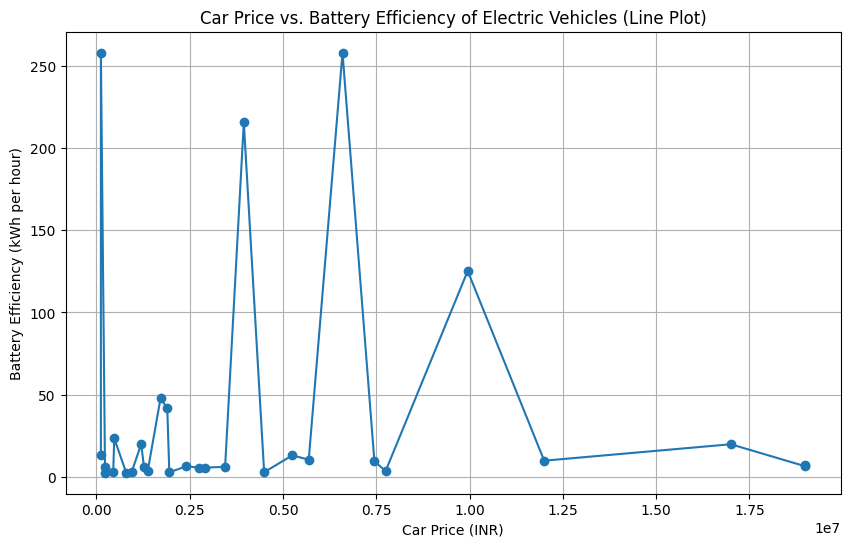

In [ ]:
df_ev_details['Battery_efficiency']=df_ev_details['Battery_cap']/df_ev_details['Charge_time hours']
plt.figure(figsize=(10, 6))

df_new_sorted = df_ev_details.sort_values('Car_price')
plt.plot(df_new_sorted['Car_price'], df_new_sorted['Battery_efficiency'], marker='o')

plt.title('Car Price vs. Battery Efficiency of Electric Vehicles (Line Plot)')
plt.xlabel('Car Price (INR)')
plt.ylabel('Battery Efficiency (kWh per hour)')
plt.grid(True)
plt.show()

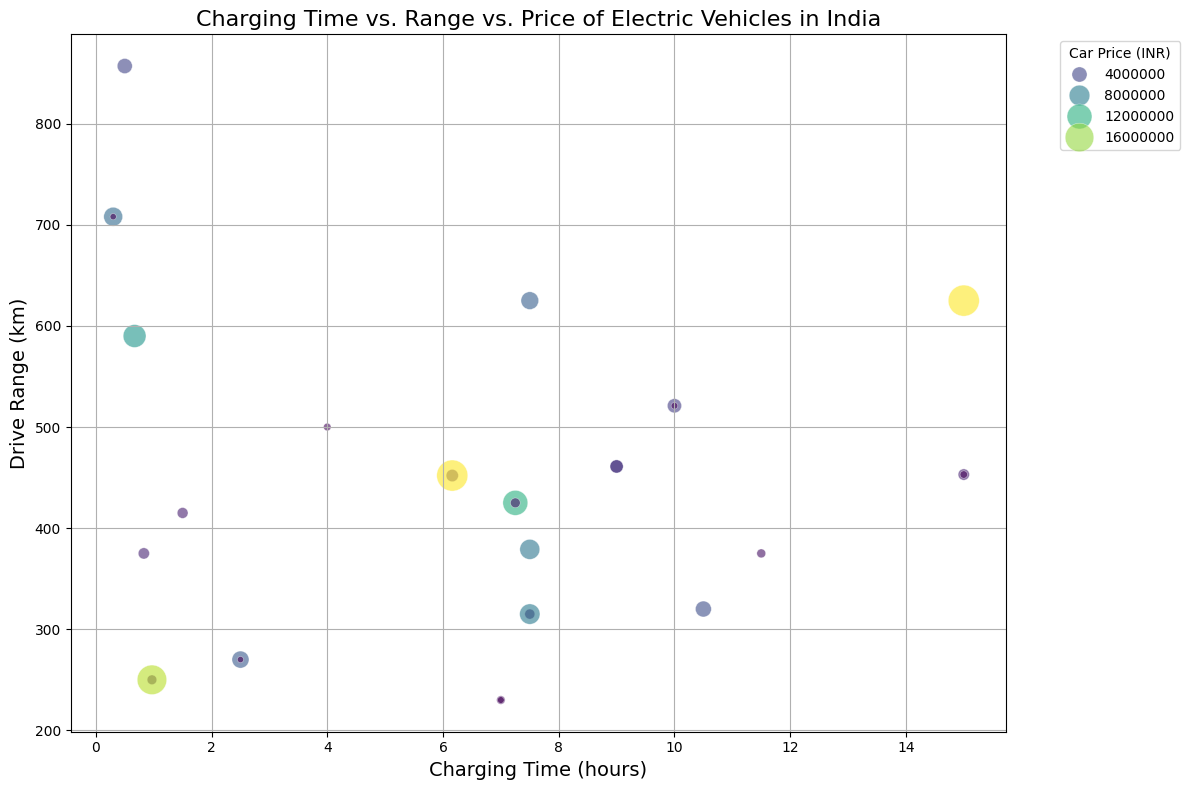

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_ev_details, x='Charge_time hours', y='Drive_range', size='Car_price', sizes=(20, 500), alpha=0.6, hue='Car_price', palette='viridis')

#scatter plot for charging time vs range vs price
plt.title('Charging Time vs. Range vs. Price of Electric Vehicles in India', fontsize=16)
plt.xlabel('Charging Time (hours)', fontsize=14)
plt.ylabel('Drive Range (km)', fontsize=14)
plt.legend(title='Car Price (INR)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid()
plt.tight_layout()
plt.show()

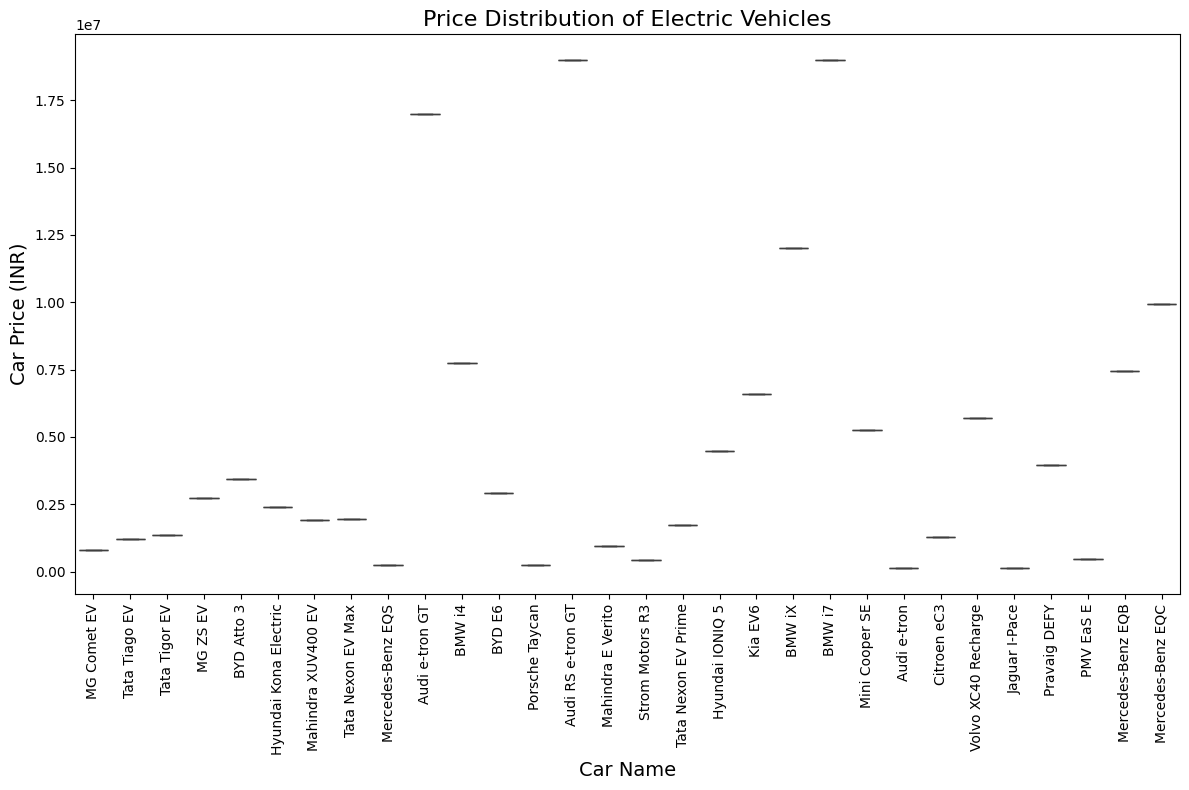

In [ ]:
#box plot for price distribution by vehicle type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_ev_details, x='Car_name', y='Car_price')
plt.title('Price Distribution of Electric Vehicles', fontsize=16)
plt.xlabel('Car Name', fontsize=14)
plt.ylabel('Car Price (INR)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
print(df_ev_category.fillna(0, inplace=True))

None


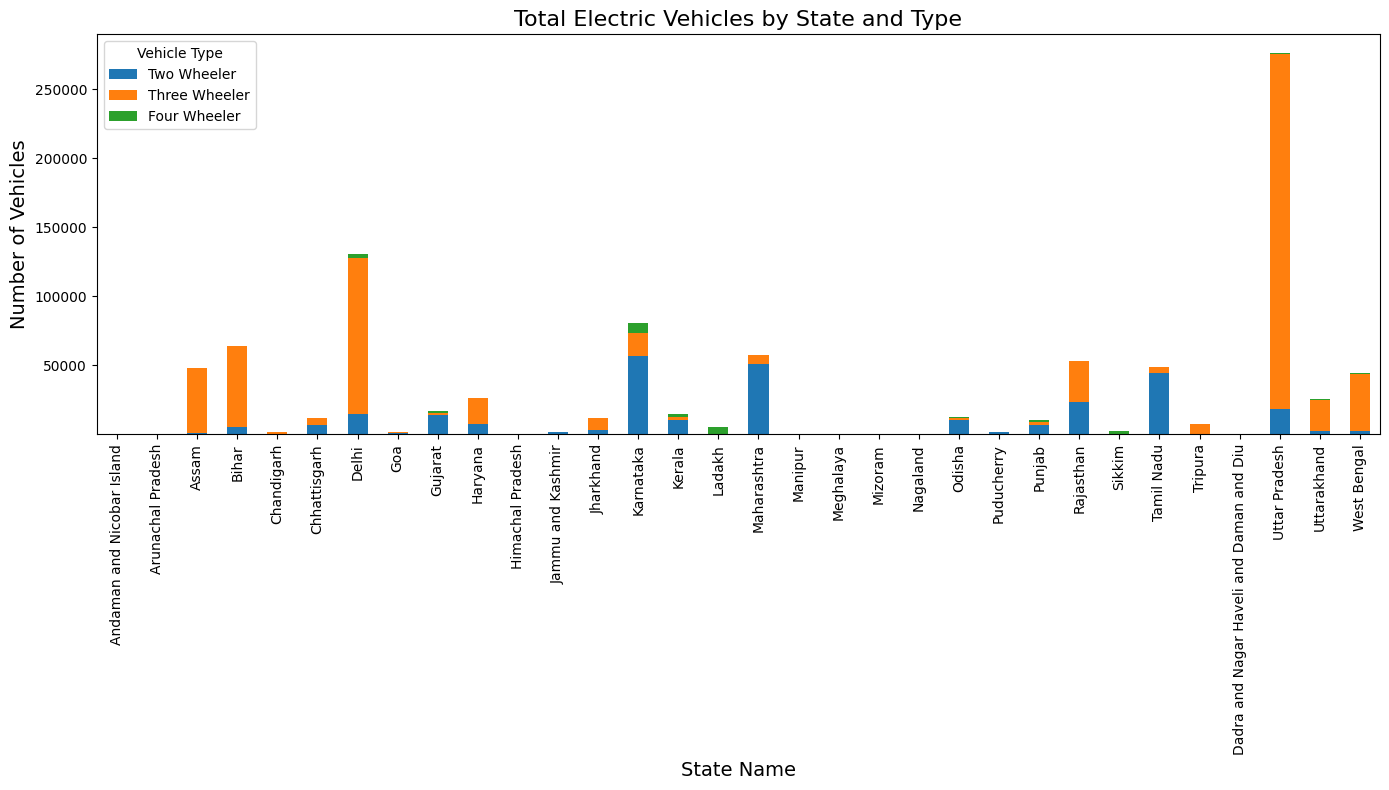

In [ ]:
total_vehicles_by_state = df_ev_category[['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler']].copy()
total_vehicles_by_state.set_index('State Name', inplace=True)
total_vehicles_by_state.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Total Electric Vehicles by State and Type', fontsize=16)
plt.xlabel('State Name', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

# Market Segmentation on consumer data. K-A-P

In [ ]:
print(df_survey.isnull().sum())

gender        0
age           0
occupation    0
K1            0
K2            0
K3            0
K4            0
K5            0
ATT1          0
ATT2          0
ATT3          0
ATT4          0
ATT5          0
P1            0
P2            0
P3            0
P4            0
P5            0
Cluster       0
dtype: int64


In [ ]:
#filling empty cells with mean values
df_survey.fillna(df_survey.mean(), inplace=True)

In [ ]:
#converting to numerical values
df_survey = pd.get_dummies(df_survey, drop_first=True)

In [64]:
#performing standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df_survey.select_dtypes(include=['float64', 'int64']).columns
df_survey[numerical_features] = scaler.fit_transform(df_survey[numerical_features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

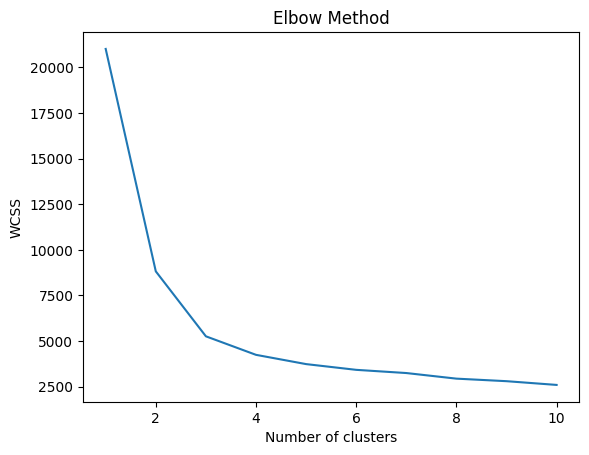

In [ ]:
#performing K-means
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_survey)
    wcss.append(kmeans.inertia_)

#finding number of clusters using the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#selected 3 as cluster value
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_survey['Cluster'] = kmeans.fit_predict(df_survey)

# Display the first few rows with cluster labels with tabulate
print(tabulate(df_survey.head(), headers='keys', tablefmt='psql'))

+----+-----------+-----------+--------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|    |    gender |       age |   occupation |        K1 |        K2 |        K3 |        K4 |        K5 |      ATT1 |      ATT2 |      ATT3 |      ATT4 |      ATT5 |        P1 |        P2 |        P3 |        P4 |        P5 |   Cluster |
|----+-----------+-----------+--------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------|
|  0 | -1.2695   | -1.27746  |    -1.29124  | -1.73172  | -1.73172  | -1.73172  | -1.73172  | -1.73172  | -1.73172  | -1.73172  | -1.73172  | -1.73172  | -1.73172  | -1.73172  | -1.73172  | -1.65319  | -1.65319  | -1.65319  |         0 |
|  1 |  0.787712 | -0.366031 |    -0.383728 | -1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


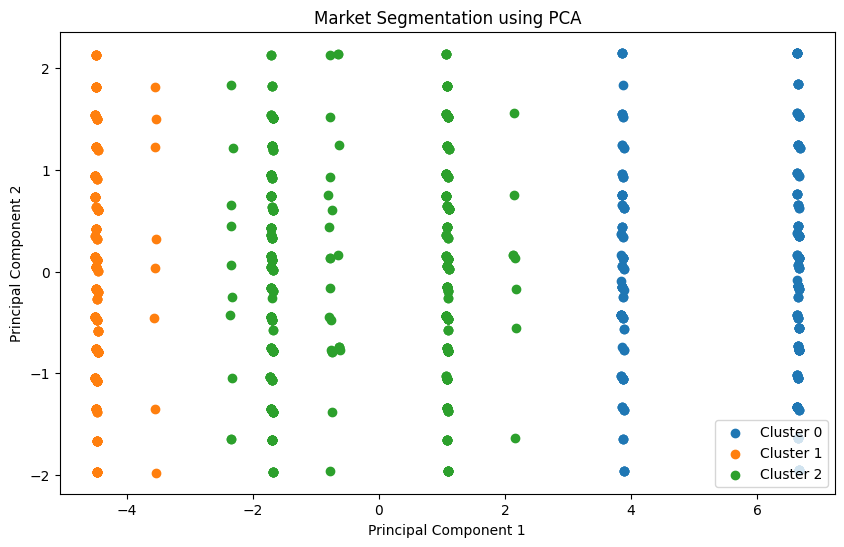

In [ ]:
from sklearn.decomposition import PCA

#PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_survey.drop('Cluster', axis=1))

#PCA dataframe
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_survey['Cluster']

#plotting the segmented scatter plots
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    plt.scatter(pca_df[pca_df['Cluster'] == cluster]['PC1'],
                pca_df[pca_df['Cluster'] == cluster]['PC2'],
                label=f'Cluster {cluster}')
plt.title('Market Segmentation using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
profile=df_survey.groupby('Cluster').mean().reset_index()

#using demograhic data

demographic_columns=['gender','age','occupation']
demographics=df_survey[demographic_columns+['Cluster']].groupby('Cluster').agg(lambda x: x.mode()[0]).reset_index()

profile=profile.merge(demographics,on='Cluster')

print(tabulate(profile, headers='keys', tablefmt='psql'))

+----+-----------+------------+------------+----------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-----------+----------------+
|    |   Cluster |   gender_x |      age_x |   occupation_x |         K1 |         K2 |         K3 |         K4 |         K5 |       ATT1 |       ATT2 |       ATT3 |       ATT4 |       ATT5 |         P1 |         P2 |         P3 |         P4 |         P5 |   gender_y |     age_y |   occupation_y |
|----+-----------+------------+------------+----------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-----------+----------------|
|  0 |         0 | -0.0262922 |  0.033947  |      0.027085  | -1.45937   | -1.45937   | -1.45937   | -1